In [3]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler, Stream
import re
import json
import time
import datetime
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import clear_output

access_token = ''
access_token_secret = ''
consumer_key = ''
consumer_secret = ''

#Try get token and consumer key from http://developer.twitter.com
with open('key.txt') as fp:
    access_token = fp.readline()
    access_token_secret = fp.readline()
    consumer_key = fp.readline()
    consumer_secret = fp.readline()
    
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

fp = mpl.font_manager.FontProperties(family='TH Sarabun New',size=20)

In [2]:
def extract_hash_tags(text):
    return set(re.findall(r"#(\w+)", text))
# extract_hash_tags("#test http://example.org/#comments #test")
# >>>['test', 'comments', 'test']

In [3]:
def show_plot(dic):
    sorted_d = sorted((value, key) for (key,value) in dic.items())
    values = [i[0] for i in sorted_d]
    bars = [i[1] for i in sorted_d]
    
    if len(values) > 9 and len(bars) > 9:
        values = values[len(values)-10:len(values)]
        bars = tuple(bars[len(bars)-10:len(bars)])
    else:
        bars = tuple(bars)
    
    clear_output()
    y_pos = np.arange(len(bars))
    plt.barh(y_pos, values)
    plt.yticks(y_pos, bars, fontproperties=fp)
    plt.show()

In [4]:
class MyListener(StreamListener):
    def __init__(self):
        self.count = 0
        self.dict = {}
        self.start = time.time()

        
    def on_data(self, data):
        raw = json.loads(data)
        self.count = self.count + 1
        hashtagSet = extract_hash_tags(raw['text'])
        
        if hashtagSet:
            for i in hashtagSet:
                if i in self.dict:
                    self.dict[i] += 1
                else:
                    self.dict[i] = 1
        
        show_plot(self.dict)
        print("Counting :",self.count, "| Timing :",str(datetime.timedelta(seconds=time.time()-self.start)),"\nText :", raw['text'],end='\r')
        if self.count%100 == 0:
            time.sleep(5)
        
        try:
            with open('data.json', 'a', encoding='utf8') as f:
                json.dump(raw, f, ensure_ascii=False)
                f.write('\n')
#                 return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        
        if self.count%200 == 0:
            print('Dict :', self.dict)
            print("Counting :",self.count, "| Timing :",str(datetime.timedelta(seconds=time.time()-self.start)))
            sys.exit(0)
        
        return True
    
    def on_error(self, status):
        print(status)
        return True

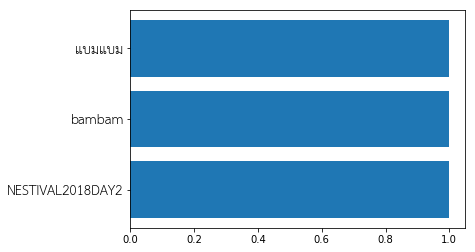

Counting : 5 | Timing : 0:01:17.772353 
Text : RT @TomyamWasabi: 23ธ.ค วันเฉลิมพระชนมพรรษา 85 พรรษาของสมเด็จพระจักรพรรดิอากิฮิโตะ👑



In [5]:
listener3 = MyListener()
twitter_stream3 = Stream(auth, listener3)
twitter_stream3.filter(track=['news'], languages=['th'], is_async=True)